In [1]:
pip install gensim==3.8.3

     |████████████████████████████████| 24.2 MB 381 kB/s eta 0:00:01
     |████████████████████████████████| 56 kB 1.6 MB/s  eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
import gensim
from gensim.models.wrappers import DtmModel
import pandas as pd
import os
import re
from random import shuffle
import gensim.corpora as corpora
from time import time
import numpy as np
from sklearn.linear_model import LinearRegression

In [3]:
import matplotlib.pyplot as plt

### model = DtmModel.load("Models/uden_shuffle_2_26_topics")

In [4]:
model = DtmModel.load("Models/26_01_23_26_topics")

In [5]:
n = 1

In [6]:
topics = model.show_topic(topicid=n, time=0, num_words=10)

/opt/conda/lib/python3.7/site-packages/gensim/models/wrappers/dtmmodel.py:498: UserWarning: The parameter `num_words` is deprecated, will be removed in 4.0.0, use `topn` instead.
  warnings.warn("The parameter `num_words` is deprecated, will be removed in 4.0.0, use `topn` instead.")


In [7]:
topics

[(0.0920527946795955, 'nordisk'),
 (0.08381416638502802, 'samarbejde'),
 (0.05171979780117954, 'land'),
 (0.015901221850828748, 'norden'),
 (0.013562685163812198, 'område'),
 (0.013223472348264487, 'grænse'),
 (0.013221378660110665, 'arbejde'),
 (0.012620035816987634, 'fælles'),
 (0.011879922465211074, 'europæisk'),
 (0.011219727838003546, 'Sverige')]

In [8]:
Topic_labels = ["Udenrigsanliggende", "Norden", "Fiskeri", "Afgifter", "Flygtninge/Indvandrer", "Folkeafstemning", "Menneskeretttigheder", 
                "Skib/Energi", "Landbrug", "Børn/Familie", "Transport", "EU/Handel", "Miljø", "Finans", "Generelt EU/EF", "Stof/Mærkning", 
                "Økonomi", "Arbejdsmiljø", "Rigsfællesskab"]

In [9]:
Topic_number = [0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 15, 18, 21, 22, 24, 25]

In [10]:
for topic in topics:
    print(f"({np.round(topic[0], 5)}, {topic[1]})")

(0.09205, nordisk)
(0.08381, samarbejde)
(0.05172, land)
(0.0159, norden)
(0.01356, område)
(0.01322, grænse)
(0.01322, arbejde)
(0.01262, fælles)
(0.01188, europæisk)
(0.01122, Sverige)


In [11]:
topics = model.show_topic(topicid=n, time=1, num_words=10)

In [12]:
topics

[(0.08911332310909383, 'nordisk'),
 (0.08463562164692603, 'samarbejde'),
 (0.05192904484905715, 'land'),
 (0.01605191071101352, 'grænse'),
 (0.013738076815865148, 'område'),
 (0.012917661568946387, 'fælles'),
 (0.01270344197520677, 'arbejde'),
 (0.012295373109491577, 'norden'),
 (0.011833237265133814, 'europæisk'),
 (0.011530253304656653, 'Sverige')]

In [13]:
for topic in topics:
    print(f"({np.round(topic[0], 5)}, {topic[1]})")

(0.08911, nordisk)
(0.08464, samarbejde)
(0.05193, land)
(0.01605, grænse)
(0.01374, område)
(0.01292, fælles)
(0.0127, arbejde)
(0.0123, norden)
(0.01183, europæisk)
(0.01153, Sverige)


In [14]:
topics = model.show_topic(topicid=n, time=2, num_words=10)

In [15]:
topics

[(0.08804061277039169, 'nordisk'),
 (0.08608006843440272, 'samarbejde'),
 (0.052430583845019495, 'land'),
 (0.016893269617392574, 'grænse'),
 (0.013960157978372297, 'område'),
 (0.013250511991748589, 'fælles'),
 (0.013009797670878093, 'arbejde'),
 (0.011741446420165013, 'europæisk'),
 (0.011607108515741139, 'Sverige'),
 (0.011286869656069634, 'svensk')]

In [16]:
for topic in topics:
    print(f"({np.round(topic[0], 5)}, {topic[1]})")

(0.08804, nordisk)
(0.08608, samarbejde)
(0.05243, land)
(0.01689, grænse)
(0.01396, område)
(0.01325, fælles)
(0.01301, arbejde)
(0.01174, europæisk)
(0.01161, Sverige)
(0.01129, svensk)


In [17]:
for topic in topics:
    print(f"({np.round(topic[0], 5)}, {topic[1]})")

(0.08804, nordisk)
(0.08608, samarbejde)
(0.05243, land)
(0.01689, grænse)
(0.01396, område)
(0.01325, fælles)
(0.01301, arbejde)
(0.01174, europæisk)
(0.01161, Sverige)
(0.01129, svensk)


In [18]:
model.gamma_[0:2]

array([[2.22821993e-03, 3.33538048e-04, 1.73917731e-02, 1.59954050e-02,
        4.66802722e-03, 9.66900005e-04, 7.87434741e-03, 1.38497093e-01,
        3.16011963e-02, 2.67129855e-02, 1.07249629e-02, 7.44406017e-03,
        1.22089099e-03, 6.38311204e-03, 6.24413441e-02, 3.09196558e-02,
        2.54805899e-01, 4.90872810e-05, 5.90117130e-02, 1.48781627e-06,
        1.71268619e-01, 1.48781627e-06, 1.19721355e-01, 1.73090856e-02,
        2.40558484e-03, 1.00221691e-02],
       [7.89727228e-06, 7.89727228e-06, 3.92942849e-03, 2.51417272e-03,
        7.89727228e-06, 7.89727228e-06, 7.89727228e-06, 7.89727228e-06,
        9.00613160e-03, 7.50945841e-03, 7.89727228e-06, 7.89727228e-06,
        7.89727228e-06, 7.89727228e-06, 9.63760516e-03, 7.89727228e-06,
        7.89727228e-06, 1.27858703e-02, 1.23279385e-01, 7.89727228e-06,
        3.21214501e-03, 7.89727228e-06, 3.90921650e-01, 4.30499283e-01,
        6.58641131e-03, 7.89727228e-06]])

In [19]:
Antal_80 = [507, 594, 510 ,526 ,423 ,868 ,608 ,673 ,942 ,998]

In [20]:
Antal_90 = [1093, 1646, 1729, 1289, 1699, 2058, 2374, 2049, 1868, 2874]

In [21]:
Antal_00 = [2689 ,1940 ,2167 ,2434 ,2113 ,1321 ,1724 ,1775 ,1689]

In [22]:
sum(Antal_80) + sum(Antal_90) + sum(Antal_00)

43180

In [23]:
Alle_år_antal = Antal_80 + Antal_90 + Antal_00
antal_indtil = 0
andel_år_miljø = []
for i in range(29):
    antal_år = Alle_år_antal[i]
    del_matrix = model.gamma_[antal_indtil:antal_indtil + antal_år]
    antal_indtil += antal_år
    topic_documents = [række[13] for række in del_matrix]
    andel_år_miljø.append(sum([i>0.01 for i in topic_documents])/antal_år)

In [50]:
Alle_år_antal = Antal_80 + Antal_90 + Antal_00
antal_indtil = 0
andel_år_landbrug = []
antal_år_landbrug = []
for i in range(29):
    antal_år = Alle_år_antal[i]
    del_matrix = model.gamma_[antal_indtil:antal_indtil + antal_år]
    antal_indtil += antal_år
    topic_documents = [række[9] for række in del_matrix]
    andel_år_landbrug.append(sum([i>0.01 for i in topic_documents])/antal_år)
    antal_år_landbrug.append(sum([i>0.01 for i in topic_documents]))

In [51]:
antal_år_landbrug

[139,
 128,
 74,
 128,
 75,
 112,
 186,
 127,
 147,
 139,
 167,
 142,
 189,
 164,
 214,
 227,
 285,
 168,
 185,
 192,
 198,
 125,
 219,
 189,
 138,
 78,
 234,
 74,
 75]

In [25]:
Alle_år_antal = Antal_80 + Antal_90 + Antal_00
antal_indtil = 0
andel_år_fiskeri = []
for i in range(29):
    antal_år = Alle_år_antal[i]
    del_matrix = model.gamma_[antal_indtil:antal_indtil + antal_år]
    antal_indtil += antal_år
    topic_documents = [række[13] for række in del_matrix]
    andel_år_fiskeri.append(sum([i>0.01 for i in topic_documents])/antal_år)

In [26]:
antal_indtil

43180

In [27]:
labels = [str((80+i)%100) for i in range(20)] + ["0" + str(i) for i in range(9)]

In [28]:
labels

['80',
 '81',
 '82',
 '83',
 '84',
 '85',
 '86',
 '87',
 '88',
 '89',
 '90',
 '91',
 '92',
 '93',
 '94',
 '95',
 '96',
 '97',
 '98',
 '99',
 '00',
 '01',
 '02',
 '03',
 '04',
 '05',
 '06',
 '07',
 '08']

(0.0, 0.3)

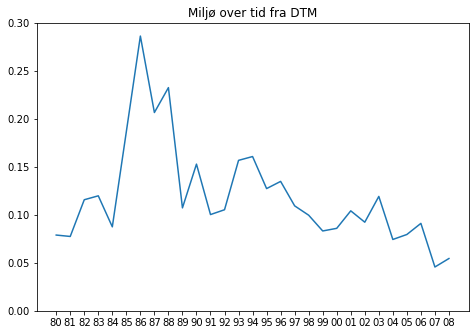

In [29]:
plt.axes([0, 0.6, 1, 1])
plt.plot(labels, andel_år_miljø)
plt.title("Miljø over tid fra DTM")
#fig.figsize=(100,10)
plt.ylim([0, 0.3])
#plt.axes([0, 0.6, 1, 1])

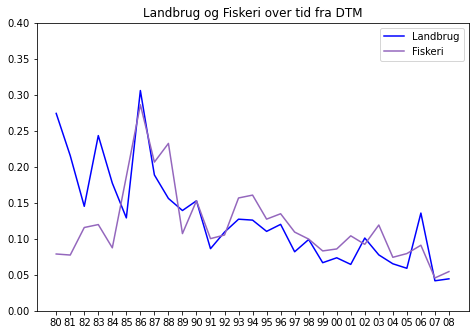

In [30]:
plt.axes([0, 0.6, 1, 1])
plt.plot(labels, andel_år_landbrug, color="b", label="Landbrug")
plt.plot(labels, andel_år_fiskeri, color='tab:purple', label="Fiskeri")
plt.ylim([0, 0.4])
plt.legend()
plt.title("Landbrug og Fiskeri over tid fra DTM")
plt.savefig("Plots/Landbrug_fiskeri")

Text(0.5, 1.0, 'Landbrug over tid fra DTM')

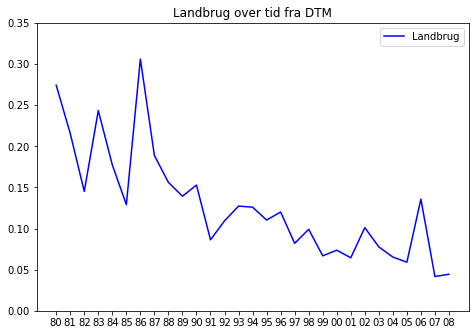

In [31]:
plt.axes([0, 0.6, 1, 1])
plt.plot(labels, andel_år_landbrug, color="b", label="Landbrug")
plt.ylim([0, 0.35])
plt.legend()
plt.title("Landbrug over tid fra DTM")
#plt.savefig("Plots/Landbrug_fiskeri")

## Topic 0

In [32]:
antal_indtil = 0
andel_år_ud = []
for i in range(29):
    antal_år = Alle_år_antal[i]
    del_matrix = model.gamma_[antal_indtil:antal_indtil + antal_år]
    antal_indtil += antal_år
    topic_documents = [række[0] for række in del_matrix]
    andel_år_ud.append(sum([i>0.01 for i in topic_documents])/antal_år)

Text(0.5, 1.0, 'Topic 0 over tid fra DTM')

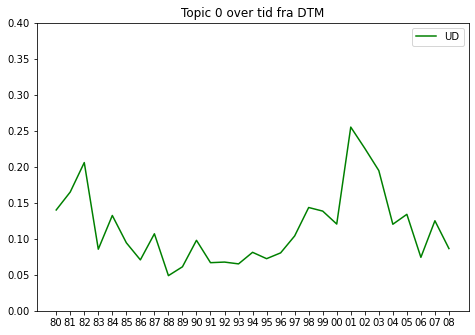

In [33]:
plt.axes([0, 0.6, 1, 1])
plt.plot(labels, andel_år_ud, color="g", label="UD")
plt.ylim([0, 0.4])
plt.legend()
plt.title("Topic 0 over tid fra DTM")
#plt.savefig("Plots/Landbrug_fiskeri")

## Nordisk samarbejde topic 1

In [34]:
antal_indtil = 0
andel_år_NS = []
for i in range(29):
    antal_år = Alle_år_antal[i]
    del_matrix = model.gamma_[antal_indtil:antal_indtil + antal_år]
    antal_indtil += antal_år
    topic_documents = [række[1] for række in del_matrix]
    andel_år_NS.append(sum([i>0.01 for i in topic_documents])/antal_år)

Text(0.5, 1.0, 'Nordisk samarbejde over tid fra DTM')

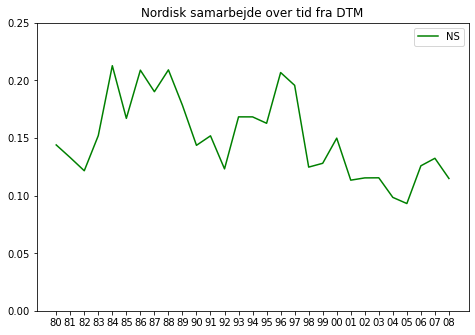

In [35]:
plt.axes([0, 0.6, 1, 1])
plt.plot(labels, andel_år_NS, color="g", label="NS")
plt.ylim([0, 0.25])
plt.legend()
plt.title("Nordisk samarbejde over tid fra DTM")
#plt.savefig("Plots/Landbrug_fiskeri")

## Topic afgift

In [36]:
Alle_år_antal = Antal_80 + Antal_90 + Antal_00
antal_indtil = 0
andel_år_afgift = []
for i in range(29):
    antal_år = Alle_år_antal[i]
    del_matrix = model.gamma_[antal_indtil:antal_indtil + antal_år]
    antal_indtil += antal_år
    topic_documents = [række[3] for række in del_matrix]
    andel_år_afgift.append(sum([i>0.01 for i in topic_documents])/antal_år)

Text(0.5, 1.0, 'Afgift over tid fra DTM')

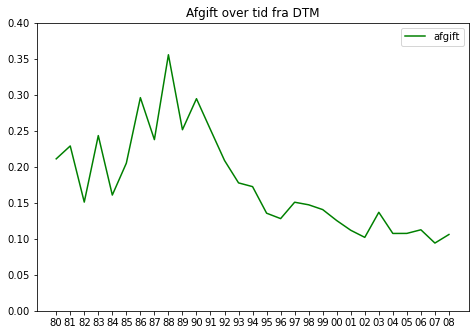

In [37]:
plt.axes([0, 0.6, 1, 1])
plt.plot(labels, andel_år_afgift, color="g", label="afgift")
plt.ylim([0, 0.4])
plt.legend()
plt.title("Afgift over tid fra DTM")
#plt.savefig("Plots/Landbrug_fiskeri")

## Topic 4

In [38]:
Alle_år_antal = Antal_80 + Antal_90 + Antal_00
antal_indtil = 0
andel_år_udlænding = []
for i in range(29):
    antal_år = Alle_år_antal[i]
    del_matrix = model.gamma_[antal_indtil:antal_indtil + antal_år]
    antal_indtil += antal_år
    topic_documents = [række[4] for række in del_matrix]
    andel_år_udlænding.append(sum([i>0.01 for i in topic_documents])/antal_år)

Text(0.5, 1.0, 'Topic 4(Flygtninge/Indvandre) over tid fra DTM')

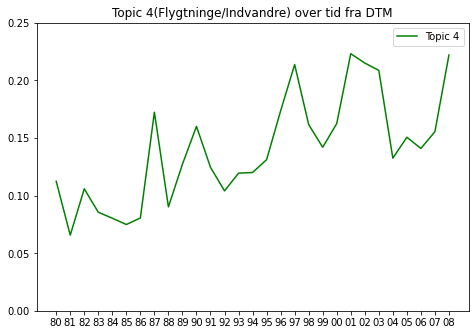

In [39]:
plt.axes([0, 0.6, 1, 1])
plt.plot(labels, andel_år_udlænding, color="g", label="Topic 4")
plt.ylim([0, 0.25])
plt.legend()
plt.title("Topic 4(Flygtninge/Indvandre) over tid fra DTM")
#plt.savefig("Plots/Landbrug_fiskeri")

### Lineær?

## Topic 5

In [40]:
Alle_år_antal = Antal_80 + Antal_90 + Antal_00
antal_indtil = 0
andel_år_folkeafstemning = []
for i in range(29):
    antal_år = Alle_år_antal[i]
    del_matrix = model.gamma_[antal_indtil:antal_indtil + antal_år]
    antal_indtil += antal_år
    topic_documents = [række[5] for række in del_matrix]
    andel_år_folkeafstemning.append(sum([i>0.01 for i in topic_documents])/antal_år)

Text(0.5, 1.0, 'Folkeafstemning over tid fra DTM')

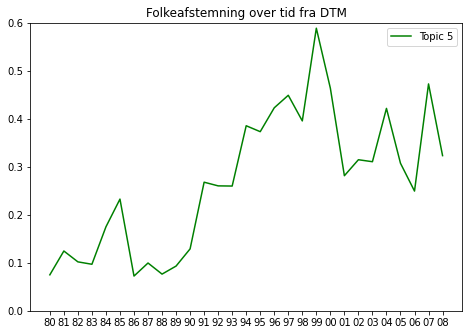

In [41]:
plt.axes([0, 0.6, 1, 1])
plt.plot(labels, andel_år_folkeafstemning, color="g", label="Topic 5")
plt.ylim([0, 0.6])
plt.legend()
plt.title("Folkeafstemning over tid fra DTM")
#plt.savefig("Plots/Landbrug_fiskeri")

## Topic 6 - Menneskerettigheder

In [42]:
Alle_år_antal = Antal_80 + Antal_90 + Antal_00
antal_indtil = 0
andel_år_menneskerettigheder = []
for i in range(29):
    antal_år = Alle_år_antal[i]
    del_matrix = model.gamma_[antal_indtil:antal_indtil + antal_år]
    antal_indtil += antal_år
    topic_documents = [række[6] for række in del_matrix]
    andel_år_menneskerettigheder.append(sum([i>0.01 for i in topic_documents])/antal_år)

Text(0.5, 1.0, 'Menneskerettigheder over tid fra DTM')

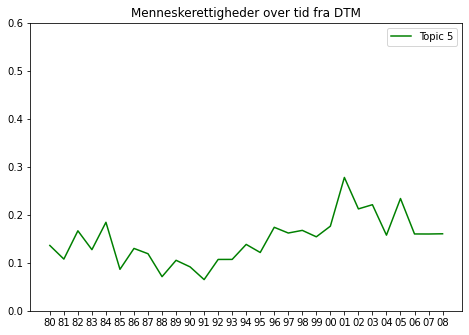

In [43]:
plt.axes([0, 0.6, 1, 1])
plt.plot(labels, andel_år_menneskerettigheder, color="g", label="Topic 5")
plt.ylim([0, 0.6])
plt.legend()
plt.title("Menneskerettigheder over tid fra DTM")
#plt.savefig("Plots/Landbrug_fiskeri")

## Topic 21 - Stof/mærkning

In [44]:
Alle_år_antal = Antal_80 + Antal_90 + Antal_00
antal_indtil = 0
andel_år_mærkning = []
for i in range(29):
    antal_år = Alle_år_antal[i]
    del_matrix = model.gamma_[antal_indtil:antal_indtil + antal_år]
    antal_indtil += antal_år
    topic_documents = [række[21] for række in del_matrix]
    andel_år_mærkning.append(sum([i>0.01 for i in topic_documents])/antal_år)

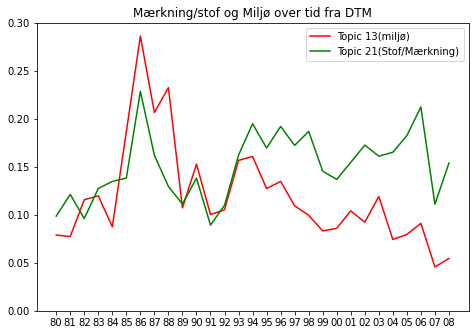

In [45]:
plt.axes([0, 0.6, 1, 1])
plt.title("Mærkning/stof og Miljø over tid fra DTM")
plt.plot(labels, andel_år_miljø, color="r", label="Topic 13(miljø) ")
plt.plot(labels, andel_år_mærkning, color="g", label="Topic 21(Stof/Mærkning)")
#fig.figsize=(100,10)
plt.ylim([0, 0.3])
plt.legend()
#plt.savefig("Plots/Landbrug_fiskeri")

## Grønland

In [46]:
Alle_år_antal = Antal_80 + Antal_90 + Antal_00
antal_indtil = 0
andel_år_grønland = []
for i in range(29):
    antal_år = Alle_år_antal[i]
    del_matrix = model.gamma_[antal_indtil:antal_indtil + antal_år]
    antal_indtil += antal_år
    topic_documents = [række[25] for række in del_matrix]
    andel_år_grønland.append(sum([i>0.01 for i in topic_documents])/antal_år)

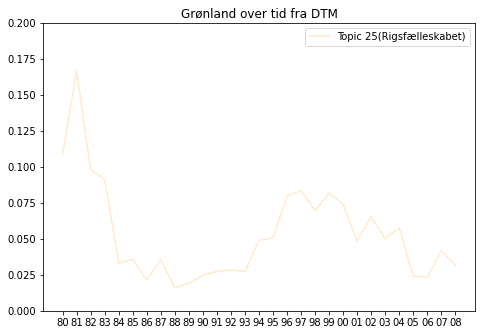

In [47]:
plt.axes([0, 0.6, 1, 1])
plt.title("Grønland over tid fra DTM")
plt.plot(labels, andel_år_grønland, color="blanchedalmond", label="Topic 25(Rigsfælleskabet)")
#fig.figsize=(100,10)
plt.ylim([0, 0.2])
plt.legend()
#plt.savefig("Plots/Landbrug_fiskeri")

## Plot af alle topics

In [238]:
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:brown', 'tab:grey', 'tab:orange', "darkcyan",
          "lime", "yellow", "navy", "deeppink", "darksalmon"]

In [239]:
len(colors)

19

In [189]:
Andele_topics_evident = []
for semantically_evidident in Topic_number:
    Alle_år_antal = Antal_80 + Antal_90 + Antal_00
    antal_indtil = 0
    andel_år_evident_topic = []
    for i in range(29):
        antal_år = Alle_år_antal[i]
        del_matrix = model.gamma_[antal_indtil:antal_indtil + antal_år]
        antal_indtil += antal_år
        topic_documents = [række[semantically_evidident] for række in del_matrix]
        andel_år_evident_topic.append(sum([i>0.01 for i in topic_documents])/antal_år)
    Andele_topics_evident.append(andel_år_evident_topic)

In [190]:
plot_colortable(mcolors.CSS4_COLORS)
plt.show()

NameError: name 'plot_colortable' is not defined

In [214]:
import matplotlib.colors as mcolors
colors = [i for i in mcolors.CSS4_COLORS]

In [215]:
import random
Random_colors = random.sample(colors, len(Topic_number))

In [223]:
import matplotlib.patches as mpatch

In [222]:
colors

['aliceblue',
 'antiquewhite',
 'aqua',
 'aquamarine',
 'azure',
 'beige',
 'bisque',
 'black',
 'blanchedalmond',
 'blue',
 'blueviolet',
 'brown',
 'burlywood',
 'cadetblue',
 'chartreuse',
 'chocolate',
 'coral',
 'cornflowerblue',
 'cornsilk',
 'crimson',
 'cyan',
 'darkblue',
 'darkcyan',
 'darkgoldenrod',
 'darkgray',
 'darkgreen',
 'darkgrey',
 'darkkhaki',
 'darkmagenta',
 'darkolivegreen',
 'darkorange',
 'darkorchid',
 'darkred',
 'darksalmon',
 'darkseagreen',
 'darkslateblue',
 'darkslategray',
 'darkslategrey',
 'darkturquoise',
 'darkviolet',
 'deeppink',
 'deepskyblue',
 'dimgray',
 'dimgrey',
 'dodgerblue',
 'firebrick',
 'floralwhite',
 'forestgreen',
 'fuchsia',
 'gainsboro',
 'ghostwhite',
 'gold',
 'goldenrod',
 'gray',
 'green',
 'greenyellow',
 'grey',
 'honeydew',
 'hotpink',
 'indianred',
 'indigo',
 'ivory',
 'khaki',
 'lavender',
 'lavenderblush',
 'lawngreen',
 'lemonchiffon',
 'lightblue',
 'lightcoral',
 'lightcyan',
 'lightgoldenrodyellow',
 'lightgray',
 

In [216]:
Random_colors

['olivedrab',
 'khaki',
 'darkseagreen',
 'lightgray',
 'whitesmoke',
 'darkmagenta',
 'lawngreen',
 'skyblue',
 'orange',
 'brown',
 'darkorange',
 'darkslategray',
 'plum',
 'mediumpurple',
 'oldlace',
 'mediumseagreen',
 'mediumspringgreen',
 'green',
 'seagreen']

In [ ]:
plt.axes([0, 0.6, 1, 1])
plt.title("Semantically evident topics over tid fra DTM")
for semantifally_evident in Topic_number:
    index = Topic_number.index(semantifally_evident)
    plt.plot(labels, Andele_topics_evident[index], color=Random_colors[index], label=Topic_labels[index])
plt.ylim([0, 0.6])
plt.legend()

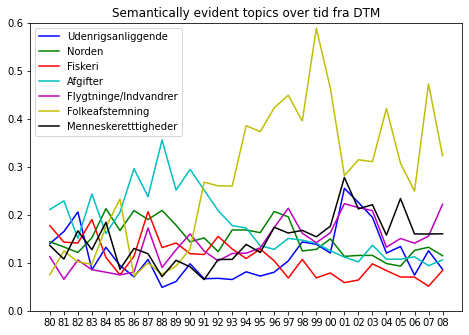

In [191]:
plt.axes([0, 0.6, 1, 1])
plt.title("Semantically evident topics over tid fra DTM")
for semantifally_evident in Topic_number[0:7]:
    index = Topic_number.index(semantifally_evident)
    plt.plot(labels, Andele_topics_evident[index], color=colors[index], label=Topic_labels[index])
plt.ylim([0, 0.6])
plt.legend()

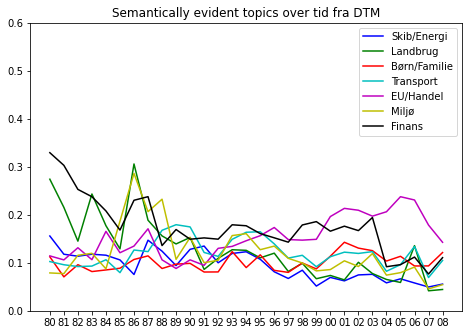

In [195]:
plt.axes([0, 0.6, 1, 1])
plt.title("Semantically evident topics over tid fra DTM")
for semantifally_evident in Topic_number[7:14]:
    index = Topic_number.index(semantifally_evident)
    plt.plot(labels, Andele_topics_evident[index], color=colors[index%7], label=Topic_labels[index])
plt.ylim([0, 0.6])
plt.legend()

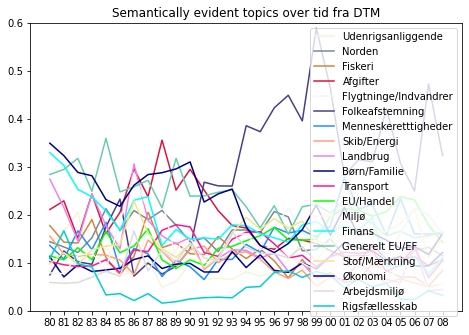

In [196]:
plt.axes([0, 0.6, 1, 1])
plt.title("Semantically evident topics over tid fra DTM")
for semantifally_evident in Topic_number:
    index = Topic_number.index(semantifally_evident)
    plt.plot(labels, Andele_topics_evident[index], color=Random_colors[index], label=Topic_labels[index])
plt.ylim([0, 0.6])
plt.legend()

In [197]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [205]:
reg_x = np.array([i for i in range(29)])[:,np.newaxis]

In [207]:
model = LinearRegression().fit(reg_x, Andele_topics_evident[0])

In [208]:
y_pred = model.predict(reg_x)

In [209]:
y_pred

array([0.10302149, 0.10394981, 0.10487813, 0.10580645, 0.10673477,
       0.10766309, 0.10859141, 0.10951973, 0.11044805, 0.11137636,
       0.11230468, 0.113233  , 0.11416132, 0.11508964, 0.11601796,
       0.11694628, 0.1178746 , 0.11880292, 0.11973124, 0.12065956,
       0.12158787, 0.12251619, 0.12344451, 0.12437283, 0.12530115,
       0.12622947, 0.12715779, 0.12808611, 0.12901443])

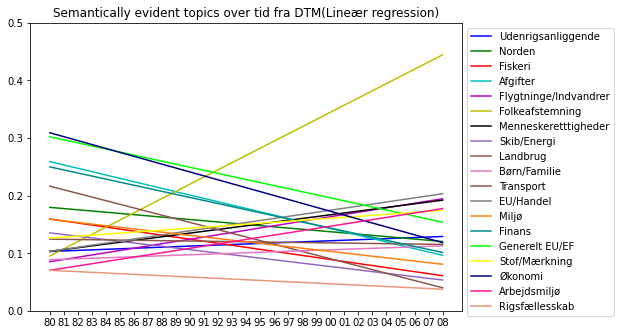

In [246]:
plt.axes([0, 0.6, 1, 1])
plt.title("Semantically evident topics over tid fra DTM(Lineær regression)")
for semantifally_evident in Topic_number:
    index = Topic_number.index(semantifally_evident)
    model = LinearRegression().fit(reg_x, Andele_topics_evident[index])
    y_pred = model.predict(reg_x)
    plt.plot(labels, y_pred, color=colors[index], label=Topic_labels[index])
plt.ylim([0, 0.5])
plt.legend(bbox_to_anchor=(1, 1))

In [218]:
len(Topic_number)

19

In [221]:
for semantifally_evident in Topic_number:
    index = Topic_number.index(semantifally_evident)
    model = LinearRegression().fit(reg_x, Andele_topics_evident[index])
    if model.coef_ > 0:
        print(Topic_labels[index])

Udenrigsanliggende
Flygtninge/Indvandrer
Folkeafstemning
Menneskeretttigheder
Børn/Familie
EU/Handel
Stof/Mærkning
Arbejdsmiljø
